In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

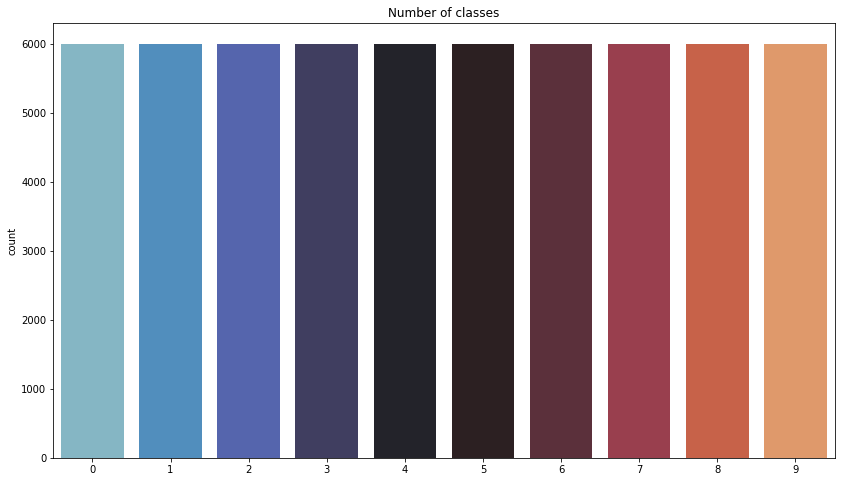

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(Y_train, palette="icefire")
plt.title("Number of classes")
plt.show()

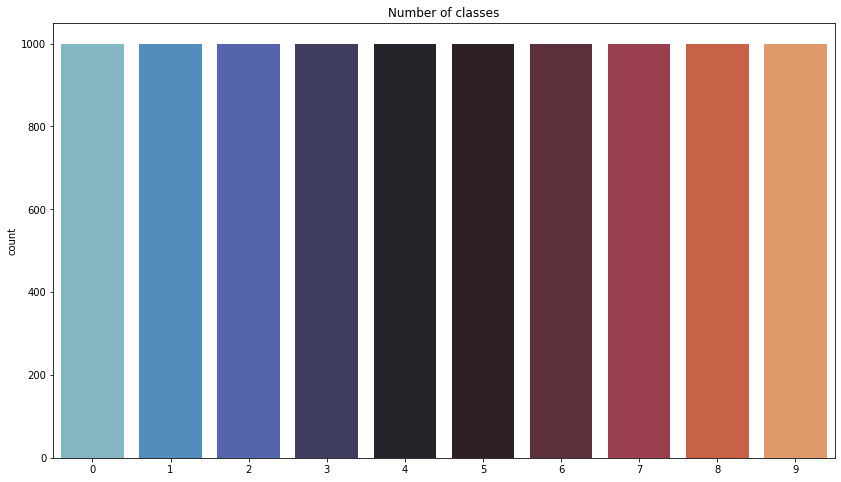

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(Y_test, palette="icefire")
plt.title("Number of classes")
plt.show()

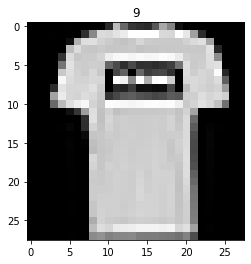

In [ ]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(Y_train[0])
plt.imshow(X_train.reshape(-1,28,28)[1],cmap="gray")

In [ ]:
# Reshaping
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [ ]:
test_all_up_images = [np.roll(x, -4, axis=0) for x in X_test]
test_all_up_images= np.array(test_all_up_images, dtype=np.float32)
test_all_up_images = test_all_up_images.astype("float") / 255.0

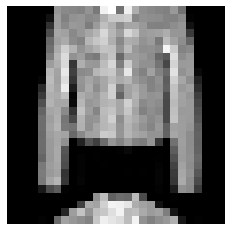

In [ ]:
# Some examples
plt.imshow(test_all_up_images[10].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
# Label Encoding (be careful! run just once!)
from keras.utils.np_utils import to_categorical 

# convert to one-hot-encoding(one hot vectors)
Y_train = to_categorical(Y_train, num_classes = 10)
# convert to one-hot-encoding(one hot vectors)
Y_test = to_categorical(Y_test, num_classes = 10)
# convert to one-hot-encoding(one hot vectors)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print("x_train shape: ",x_train.shape)
print("x_val shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_val shape :",y_val.shape)

x_train shape:  (54000, 28, 28, 1)
x_val shape:  (6000, 28, 28, 1)
y_train shape:  (54000, 10)
y_val shape : (6000, 10)


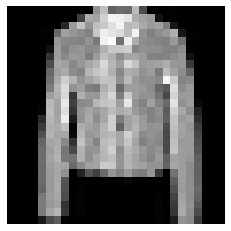

In [ ]:
# Some examples
plt.imshow(X_test[10].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

model = Sequential()

#1. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#3. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(392))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 32 # for better result increase the epochs
batch_size = 100

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=4,  # randomly shift images horizontally
        height_shift_range=4,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              shuffle=True, #veriler random gelip eğitilir
                              epochs=epochs, validation_data = (x_val, y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/32
540/540 - 271s - loss: 0.5033 - accuracy: 0.8154 - val_loss: 0.3591 - val_accuracy: 0.8602 - 271s/epoch - 502ms/step
Epoch 2/32
540/540 - 258s - loss: 0.3538 - accuracy: 0.8691 - val_loss: 0.2916 - val_accuracy: 0.8965 - 258s/epoch - 478ms/step
Epoch 3/32
540/540 - 259s - loss: 0.3137 - accuracy: 0.8839 - val_loss: 0.3218 - val_accuracy: 0.8900 - 259s/epoch - 480ms/step
Epoch 4/32
540/540 - 259s - loss: 0.2863 - accuracy: 0.8935 - val_loss: 0.2532 - val_accuracy: 0.9055 - 259s/epoch - 480ms/step
Epoch 5/32
540/540 - 259s - loss: 0.2716 - accuracy: 0.8981 - val_loss: 0.3170 - val_accuracy: 0.8848 - 259s/epoch - 480ms/step
Epoch 6/32
540/540 - 258s - loss: 0.2570 - accuracy: 0.9044 - val_loss: 0.2361 - val_accuracy: 0.9112 - 258s/epoch - 478ms/step
Epoch 7/32
540/540 - 258s - loss: 0.2433 - accuracy: 0.9102 - val_loss: 0.2533 - val_accuracy: 0.9057 - 258s/epoch - 478ms/step
Epoch 8/32
540/540 - 258s - loss: 0.2359 - accuracy: 0.9128 - val_loss: 0.2296 - val_accuracy: 0.9127 - 

In [ ]:
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.19053292274475098
Test Accuracy: 0.9362000226974487


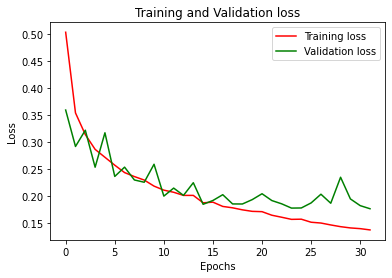

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2",color='r', label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2",color='g', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

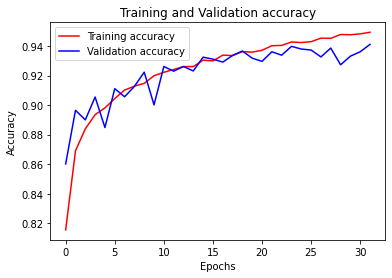

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2",color='r', label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2",color='b', label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=True,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=4,  # randomly shift images horizontally
        height_shift_range=4,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

In [ ]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              shuffle=True, #veriler random gelip eğitilir
                              epochs=5, validation_data = (test_all_up_images,  Y_test),                    
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/5
540/540 - 269s - loss: 0.1355 - accuracy: 0.9504 - val_loss: 5.1180 - val_accuracy: 0.1000 - 269s/epoch - 497ms/step
Epoch 2/5
540/540 - 265s - loss: 0.1352 - accuracy: 0.9499 - val_loss: 4.5687 - val_accuracy: 0.1000 - 265s/epoch - 491ms/step
Epoch 3/5
540/540 - 266s - loss: 0.1309 - accuracy: 0.9518 - val_loss: 4.7815 - val_accuracy: 0.1004 - 266s/epoch - 492ms/step
Epoch 4/5
540/540 - 265s - loss: 0.1291 - accuracy: 0.9518 - val_loss: 4.5843 - val_accuracy: 0.1000 - 265s/epoch - 491ms/step
Epoch 5/5
540/540 - 265s - loss: 0.1273 - accuracy: 0.9536 - val_loss: 4.2517 - val_accuracy: 0.1000 - 265s/epoch - 491ms/step


In [ ]:
test_loss_shift, test_acc_shift = model.evaluate(test_all_up_images,  Y_test, verbose=1) 

print('Test accuracy:', test_acc_shift)
print("Test loss:", test_loss_shift)

313/313 [==============================] - 12s 38ms/step - loss: 4.2517 - accuracy: 0.1000
Test accuracy: 0.10000000149011612
Test loss: 4.251742362976074


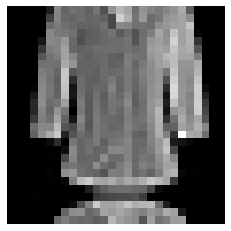

In [ ]:
# Some examples
plt.imshow(test_all_up_images[4].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()